# Extraindo as Letras da Discografia do Liam Payne

Liam James Payne (29 de agosto de 1993 – 16 de outubro de 2024) foi um cantor e compositor inglês. Ele foi membro da banda pop One Direction , uma das *boybands* mais vendidas de todos os tempos, ao lado de Niall Horan , Zayn Malik , Harry Styles e Louis Tomlinson. Payne apareceu duas vezes como candidato solo na série de televisão britânica *The X Factor* , em 2008 e 2010 ; nesta última, foi convidado a se juntar ao One Direction ao lado de outros concorrentes, ficando em terceiro lugar e, posteriormente, alcançando sucesso global.

Após o hiato do One Direction em 2016, Payne seguiu carreira solo, assinando com a Republic Records na América do Norte. Em 2017, ele lançou seu single solo de estreia *Strip That Down*, que alcançou o número três na parada de singles do Reino Unido e o número dez na *Billboard Hot 100* dos EUA . A música recebeu certificações multi-platina em ambos os países. No ano seguinte, ele lançou *For You*, uma colaboração com Rita Ora que se tornou um sucesso mundial e recebeu certificações de ouro ou platina em vários países. Seu álbum de estúdio solo, *LP1* , foi lançado em dezembro de 2019. Durante os três primeiros anos de sua carreira solo, Payne vendeu mais de 18 milhões de *singles*, 2,4 milhões de álbuns e acumulou 3,9 bilhões de *streams*. Além de seu trabalho solo, Payne produziu remixes sob os pseudônimos *Big Payno* e *Payno*, remixando faixas para seu grupo e para a cantora Cheryl.

Payne lutou contra o abuso de substâncias e doenças mentais ao longo de sua carreira. Em 16 de outubro de 2024, ele morreu aos 31 anos após cair de uma sacada do terceiro andar de um hotel em Buenos Aires , Argentina, enquanto estava embriagado. Após sua morte, a faixa de Payne *Teardrops* estreou na parada de singles do Reino Unido, juntamente com a reentrada de 11 de seus outros trabalhos. Cinco pessoas foram posteriormente acusadas em conexão com sua morte acidental: duas pessoas por fornecer-lhe narcóticos e três pessoas por negligência criminosa de uma pessoa que era um perigo para si mesma.

Mais informações no link: https://en.wikipedia.org/wiki/Liam_Payne

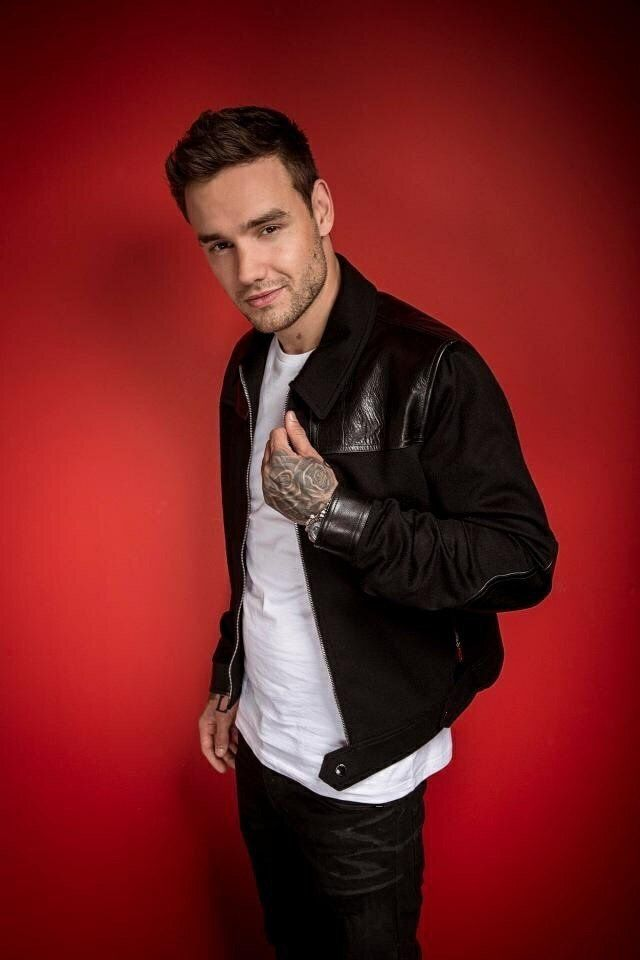

## API LyricsGenius

A API LyricsGenius é uma poderosa ferramenta que permite acessar uma vasta coleção de letras de músicas e informações sobre artistas. Desenvolvida pela Genius, uma plataforma conhecida por sua base de dados de letras e anotações, a API oferece funcionalidades que facilitam a busca por letras, detalhes de álbuns, informações sobre colaboradores e muito mais. Com suporte a consultas por nome de artista, título da música ou até mesmo trechos de letras, a API é especialmente útil para desenvolvedores que desejam integrar dados musicais em aplicativos e sites. Além disso, a API fornece recursos para obter anotações e interpretações das letras, enriquecendo a experiência do usuário ao explorar o significado das músicas. Através da LyricsGenius API, os amantes da música e os desenvolvedores podem aprofundar sua compreensão sobre as canções e seus criadores, trazendo um novo nível de interação com a música.

Mais informações e a documentação de como usar a API no link: https://docs.genius.com/

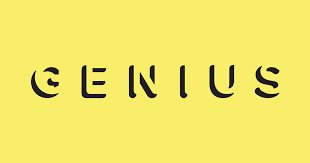

In [ ]:
import os
import pandas as pd
import requests
import lyricsgenius
import csv

# Chamada de Requisição
api_key = "YOUR_API_KEY"
genius = lyricsgenius.Genius(api_key)

# Busca do artista na API
artist = genius.search_artist("Liam Payne", max_songs=35)

Searching for songs by Liam Payne...

Song 1: "Strip That Down"
Song 2: "For You"
Song 3: "Familiar"
Song 4: "Both Ways"
Song 5: "Bedroom Floor"
Song 6: "Stack It Up"
Song 7: "First Time"
Song 8: "Naughty List"
Song 9: "All I Want (For Christmas)"
Song 10: "Live Forever"
Song 11: "Rude Hours"
Song 12: "Depend on It"
Song 13: "Remember"
Song 14: "Slow"
Song 15: "Teardrops"
Song 16: "Home with You"
Song 17: "Tell Your Friends"
Song 18: "Heart Meet Break"
Song 19: "Weekend"
Song 20: "Say It All"
Song 21: "Hips Don’t Lie"
Song 22: "Strip That Down (Acoustic)"
Song 23: "Kind Of Beautiful"
Song 24: "Before It Ends"
Song 25: "Hurting Me"
Song 26: "What Have You Done"
Song 27: "Trouble"
Song 28: "Do No Wrong"
Song 29: "Sunshine"
Song 30: "Nobody Else"
Song 31: "Down"
Song 32: "Make It With You"
Song 33: "Love Feels Best"
Song 34: "11:55"
Song 35: "Bedroom Floor (NSG Remix)"

Reached user-specified song limit (35).
Done. Found 35 songs.


In [ ]:
# Importando para um arquivo json
artist.save_lyrics()

Wrote Lyrics_LiamPayne.json.


In [ ]:
# Acessando as chaves principais dos dados contidos no arquivo JSON
data = json.load(open("Lyrics_LiamPayne.json", "r"))
data.keys()

dict_keys(['alternate_names', 'api_path', 'description', 'facebook_name', 'header_image_url', 'id', 'image_url', 'instagram_name', 'is_meme_verified', 'is_verified', 'name', 'translation_artist', 'twitter_name', 'url', 'current_user_metadata', 'followers_count', 'description_annotation', 'user', 'songs'])

In [ ]:
# Carregando dados em um dataframe e examinando os dados dentro de 'songs'
df = pd.DataFrame(data['songs'])
df.keys()

Index(['annotation_count', 'api_path', 'artist_names', 'full_title',
       'header_image_thumbnail_url', 'header_image_url', 'id',
       'lyrics_owner_id', 'lyrics_state', 'path', 'primary_artist_names',
       'pyongs_count', 'relationships_index_url', 'release_date_components',
       'release_date_for_display',
       'release_date_with_abbreviated_month_for_display',
       'song_art_image_thumbnail_url', 'song_art_image_url', 'stats', 'title',
       'title_with_featured', 'url', 'featured_artists', 'primary_artist',
       'primary_artists', 'apple_music_id', 'apple_music_player_url',
       'description', 'embed_content', 'featured_video', 'language',
       'recording_location', 'release_date', 'current_user_metadata',
       'song_art_primary_color', 'song_art_secondary_color',
       'song_art_text_color', 'album', 'custom_performances',
       'description_annotation', 'lyrics_marked_complete_by',
       'lyrics_marked_staff_approved_by', 'media', 'producer_artists',
     

In [ ]:
# Selecionando os dados úteis em um novo dataframe
df_oficial = df[['title', 'lyrics', 'release_date']].copy()

# Classificando as músicas pelo álbum
df_oficial['Album'] = df['album'].apply(lambda x: x.get('name') if isinstance(x, dict) else None)

# Eliminando músicas que não pertencem aos álbuns oficiais
df_oficial = df_oficial.drop(index=[22, 27, 32, 34])

# Reseta o índice, se necessário
df_oficial.reset_index(drop=True, inplace=True)

# Convertendo a coluna 'release_date' para o formato de data
df_oficial['release_date'] = pd.to_datetime(df_oficial['release_date'], errors='coerce')

# Extraindo apenas o ano da coluna 'release_date' para armazenar na 'release_year'
df_oficial['release_year'] = df_oficial['release_date'].dt.year

# Exibindo o dataframe resultante
df_oficial

,title,lyrics,release_date,Album,release_year
0,Strip That Down,"[Intro: Quavo]\nHuncho, Quavo\nYo, yo\n\n[Vers...",2017-05-19,LP1,2017
1,For You,"[Verse 1: Rita Ora]\nIn your eyes, I'm alive\n...",2018-01-05,LP1,2018
2,Familiar,"[Intro: J Balvin]\nJ Balvin, man\nLiam Payne, ...",2018-04-20,LP1,2018
3,Both Ways,"[Intro]\nMy girl, she like it both ways\nShe l...",2019-12-06,LP1,2019
4,Bedroom Floor,"[Verse 1]\nBaby, heard you've been talking abo...",2017-10-20,LP1,2017
5,Stack It Up,[Verse 1: Liam Payne]\nI don't wanna be broke ...,2019-09-18,LP1,2019
6,First Time,"[Intro: French Montana]\nMontana, you know wha...",2018-08-24,First Time,2018
7,Naughty List,[Intro: Liam Payne]\nOoh-ooh-ooh\nAh\n\n[Verse...,2020-10-29,None,2020
8,All I Want (For Christmas),"[Verse 1]\nTell me, where did we go wrong?\nWe...",2019-10-25,LP1,2019
9,Live Forever,"[Verse 1]\nJaded, faded\nSelf-medicated\nI did...",2019-12-06,LP1,2019


In [ ]:
import nltk
from nltk.corpus import stopwords
import re

# Define uma função para remover stopwords de um texto
def remove_stopwords(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras que não estão na lista de stopwords em inglês
    text = [x for x in text if x not in stopwords.words('english')]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de stopwords em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_stopwords(x))

# Define uma função para remover pontuação do texto
def remove_ponctuation(text):
    # Usa uma expressão regular para manter apenas letras (maiúsculas e minúsculas) e junta as palavras em uma string
    return " ".join(re.findall("[a-zA-Z]+", text))

# Aplica a função de remoção de pontuação em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_ponctuation(x))

# Define uma função para remover palavras com menos de 3 caracteres do texto
def remove_words_with_less_3(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras com mais de 3 caracteres
    text = [x for x in text if len(x) > 3]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de palavras curtas em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_words_with_less_3(x))

# Converte todo o texto em letras minúsculas em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: x.lower())

# Cria uma nova coluna 'Word Count' no dataframe que conta o número de palavras em cada linha da coluna 'lyrics'
df_oficial['Word Count'] = df_oficial['lyrics'].apply(lambda x: len(x.split(' ')))

# Função para remover as palavras indesejadas
def remove_unwanted_words(text):
    words_to_remove = ["embed", "intro", "verse", "chorus", "outro", "instrumental"]
    pattern = r'\b(?:' + '|'.join(words_to_remove) + r')\b'
    return re.sub(pattern, '', text, flags=re.IGNORECASE)

# Aplicar a função na coluna de letras
df_oficial["lyrics"] = df_oficial["lyrics"].apply(remove_unwanted_words)

# Salvar o CSV atualizado
df_oficial.to_csv("LiamPayneLyrics.csv", index=False)

In [ ]:
import sqlite3

# Criando um banco de dados de teste
conn = sqlite3.connect('LiaMpAYNE.db')

# Salvando no banco de dados
df_oficial.to_sql('lyrics', conn, index=False)

# Verificando se os dados estão presentes no banco de dados
c = conn.cursor()
c.execute('''
SELECT * FROM LYRICS
          ''')
# Visualização do Banco de Dados gerado
c.fetchall()

[('Strip That Down',
  ' quavo huncho quavo  liam payne know takin time keepin self eyes prize watchin anybody else love hard girl yeah health love cards dealt feel well  liam payne quavo know used free people want thing that changin used wanna rowdy coke bacardi sippin lightly when walk inside party girls type ferrari gear speed girl love body grinds baby yeah  liam payne quavo know love music loud come strip baby there people crowd dance hands body swing round baby swing know love music loud come strip yeah yeah yeah yeah post  sheeran liam payne strip down girl love ground girl yeah yeah yeah yeah strip down girl love ground  liam payne know since yeah swept feet know need money when love beside yeah opened heart threw away girl care bout been  liam payne quavo know used free free people want thing that changin used wanna rowdy coke bacardi sippin lightly when walk inside party girls type ferrari gear speed girl love body grinds baby  liam payne quavo know love music loud come strip